In [54]:
#22-24년 계절별로 어느국가가 많이 방문하는지 알아보기위한 앱, 클러스터링

In [55]:
#데이터 로드
import pandas as pd
df=pd.read_csv('data/df.csv')

In [56]:
df['국적지역'].unique()

array(['그리스', '나이지리아', '남아프리카공화국', '네덜란드', '네팔', '노르웨이', '뉴질랜드', '대만',
       '덴마크', '독일', '라오스', '라트비아', '러시아', '루마니아', '리투아니아', '마카오', '말레이시아',
       '멕시코', '모로코', '몽골', '미국', '미얀마', '방글라데시', '베트남', '벨기에', '불가리아',
       '브라질', '브루나이', '사우디아라비아', '스리랑카', '스웨덴', '스위스', '스페인', '슬로바키아',
       '시리아', '싱가포르', '아랍에미리트연합', '아르헨티나', '아일랜드', '에콰도르', '에티오피아', '영국',
       '오스트레일리아', '오스트리아', '요르단', '우즈베키스탄', '우크라이나', '유고슬라비아', '이라크',
       '이란', '이스라엘', '이집트', '이탈리아', '인도', '인도네시아', '일본', '중국', '체코공화국',
       '칠레', '카자흐스탄', '캄보디아', '캐나다', '케냐', '콜롬비아', '쿠웨이트', '크로아티아',
       '키르기즈', '타지키스탄', '태국', '튀니지', '튀르키예', '파키스탄', '페루', '포르투갈', '폴란드',
       '프랑스', '핀란드', '필리핀', '헝가리', '홍콩'], dtype=object)

In [58]:
df

,년,월,국적지역,입국자수,날짜,방문년월,계절
0,2022,1,그리스,390,2022-01-01,2022-01,겨울
1,2022,2,그리스,307,2022-02-01,2022-02,겨울
2,2022,3,그리스,418,2022-03-01,2022-03,봄
3,2022,4,그리스,292,2022-04-01,2022-04,봄
4,2022,5,그리스,425,2022-05-01,2022-05,봄
...,...,...,...,...,...,...,...
2872,2024,8,홍콩,61592,2024-08-01,2024-08,여름
2873,2024,9,홍콩,39815,2024-09-01,2024-09,가을
2874,2024,10,홍콩,52005,2024-10-01,2024-10,가을
2875,2024,11,홍콩,46366,2024-11-01,2024-11,가을


In [59]:
#국적지역	방문년월	입국자수	년	월	계절 컬럼만 사용
df=df[['국적지역','년','월','계절','입국자수']]

In [60]:
df

,국적지역,년,월,계절,입국자수
0,그리스,2022,1,겨울,390
1,그리스,2022,2,겨울,307
2,그리스,2022,3,봄,418
3,그리스,2022,4,봄,292
4,그리스,2022,5,봄,425
...,...,...,...,...,...
2872,홍콩,2024,8,여름,61592
2873,홍콩,2024,9,가을,39815
2874,홍콩,2024,10,가을,52005
2875,홍콩,2024,11,가을,46366


In [61]:
seasonal_df = df.groupby(['국적지역', '계절'])['입국자수'].sum().unstack(fill_value=0)

In [62]:
seasonal_df

계절,가을,겨울,봄,여름
국적지역,,,,
그리스,6870,4528,6780,6376
나이지리아,2061,1208,1367,1635
남아프리카공화국,9374,7720,7918,10627
네덜란드,37652,20694,34153,38767
네팔,25671,24940,25367,31485
...,...,...,...,...
프랑스,109318,54945,100534,102467
핀란드,9318,6385,8370,8562
필리핀,336541,219148,283039,254946


In [63]:
#컬럼순서 봄 여름 가을 겨울로 변경
seasonal_df = seasonal_df[['봄', '여름', '가을', '겨울']]

In [64]:
seasonal_df.columns

Index(['봄', '여름', '가을', '겨울'], dtype='object', name='계절')

In [65]:
#한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


plt.rcParams['font.family'] = 'NanumGothic'  # 리눅스에서 한글 폰트 사용

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


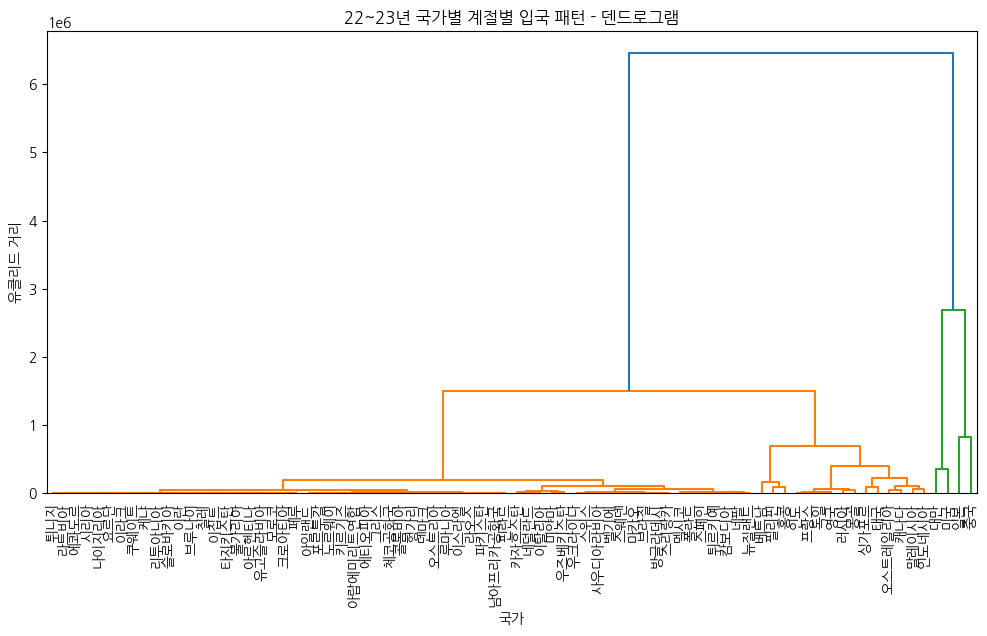

In [66]:
#덴드로그램 확인
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

# 계층적 클러스터링 수행
linkage_matrix = linkage(seasonal_df, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=seasonal_df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('22~23년 국가별 계절별 입국 패턴 - 덴드로그램')
plt.xlabel('국가')
plt.ylabel('유클리드 거리')
plt.show()

In [67]:
# 5개 클러스터가 적절해보임

In [68]:
# 계층적 클러스터링 수행
from scipy.cluster.hierarchy import linkage, fcluster

linkage_matrix = linkage(seasonal_df, method='ward')
num_clusters = 5
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
seasonal_df['클러스터'] = clusters

/var/folders/wz/cf10k4857715p70flsxw2g9m0000gn/T/ipykernel_24980/2565591907.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_df['클러스터'] = clusters


In [69]:
seasonal_df

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
그리스,6780,6376,6870,4528,1
나이지리아,1367,1635,2061,1208,1
남아프리카공화국,7918,10627,9374,7720,1
네덜란드,34153,38767,37652,20694,1
네팔,25367,31485,25671,24940,1
...,...,...,...,...,...
프랑스,100534,102467,109318,54945,2
핀란드,8370,8562,9318,6385,1
필리핀,283039,254946,336541,219148,2


In [70]:
#seasonal_df 저장
seasonal_df.to_csv('data/seasonal_df22to24.csv', index=True)

In [71]:
#1번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 1]


계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
그리스,6780,6376,6870,4528,1
나이지리아,1367,1635,2061,1208,1
남아프리카공화국,7918,10627,9374,7720,1
네덜란드,34153,38767,37652,20694,1
네팔,25367,31485,25671,24940,1
...,...,...,...,...,...
페루,3100,3304,4050,1980,1
포르투갈,7343,7637,8515,4158,1
폴란드,23131,22602,28049,11857,1


In [72]:
seasonal_df[seasonal_df['클러스터'] == 1].index

Index(['그리스', '나이지리아', '남아프리카공화국', '네덜란드', '네팔', '노르웨이', '뉴질랜드', '덴마크', '라오스',
       '라트비아', '루마니아', '리투아니아', '마카오', '멕시코', '모로코', '미얀마', '방글라데시', '벨기에',
       '불가리아', '브라질', '브루나이', '사우디아라비아', '스리랑카', '스웨덴', '스위스', '스페인', '슬로바키아',
       '시리아', '아랍에미리트연합', '아르헨티나', '아일랜드', '에콰도르', '에티오피아', '오스트리아', '요르단',
       '우즈베키스탄', '우크라이나', '유고슬라비아', '이라크', '이란', '이스라엘', '이집트', '이탈리아',
       '체코공화국', '칠레', '카자흐스탄', '캄보디아', '케냐', '콜롬비아', '쿠웨이트', '크로아티아', '키르기즈',
       '타지키스탄', '튀니지', '튀르키예', '파키스탄', '페루', '포르투갈', '폴란드', '핀란드', '헝가리'],
      dtype='object', name='국적지역')

In [73]:
#2번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 2]

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
독일,108343,89826,110215,51387,2
러시아,107640,120879,121491,83598,2
말레이시아,160512,96868,215548,161572,2
몽골,70065,99078,103757,86085,2
베트남,323437,368971,386221,261449,2
싱가포르,218269,155776,290034,226859,2
영국,96691,88708,98740,53042,2
오스트레일리아,128950,108920,158285,117347,2
인도,93179,101950,113304,61440,2


In [74]:
seasonal_df[seasonal_df['클러스터'] == 2].index

Index(['독일', '러시아', '말레이시아', '몽골', '베트남', '싱가포르', '영국', '오스트레일리아', '인도',
       '인도네시아', '캐나다', '태국', '프랑스', '필리핀', '홍콩'],
      dtype='object', name='국적지역')

In [75]:
#3번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 3]

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
대만,568698,754357,731680,584412,3
미국,811456,912403,925727,549018,3


In [76]:
#4번 클러스터에 속한 국가들
seasonal_df[seasonal_df['클러스터'] == 4]

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
일본,1373027,1562813,1935675,1042366,4


In [77]:
seasonal_df[seasonal_df['클러스터'] == 5]

계절,봄,여름,가을,겨울,클러스터
국적지역,,,,,
중국,1643787,2229939,2061648,1411737,5


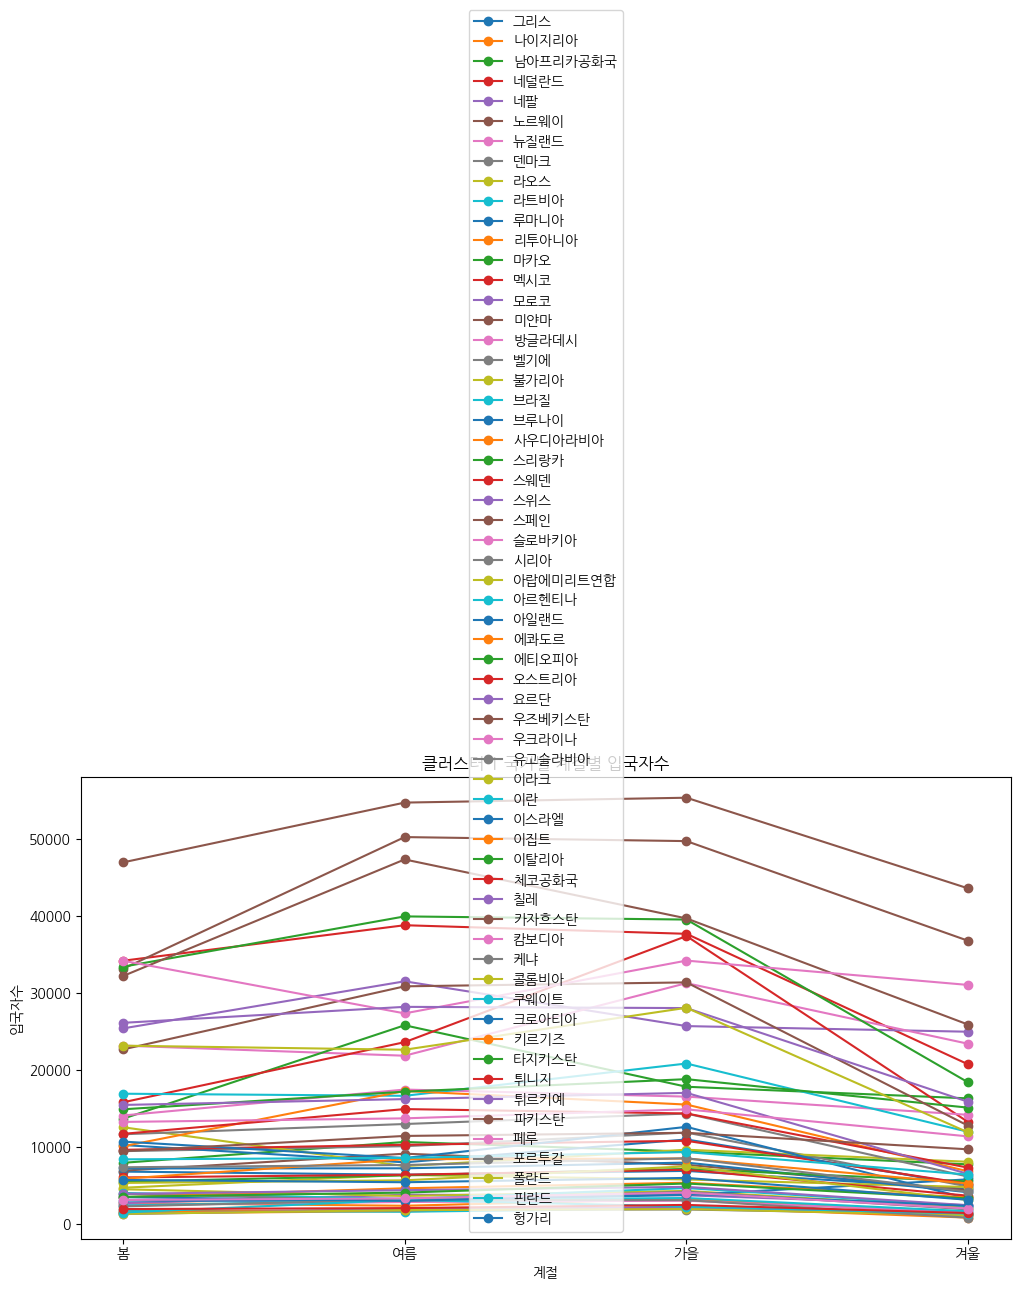

In [78]:
#클러스터별 분석
#클러스터 1
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 1].T.drop('클러스터'), marker='o')
plt.title('클러스터 1 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 1].index)
plt.show()

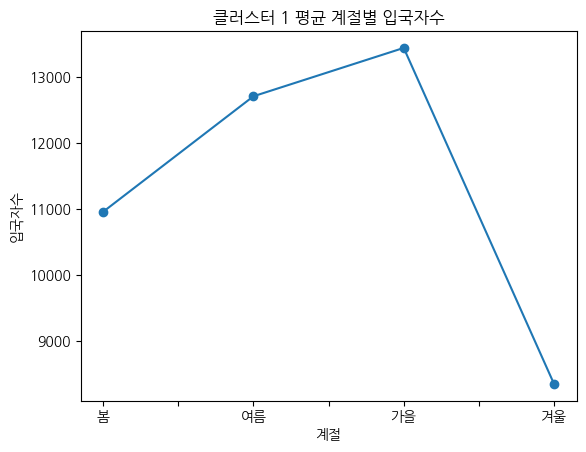

In [79]:
#클러스터1는 국가가 너무 많아 그래프가 보기 힘들어서 평균값으로 확인
seasonal_df[seasonal_df['클러스터'] == 1].drop(columns=['클러스터']).mean().plot(kind='line', marker='o')
plt.title('클러스터 1 평균 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.show()

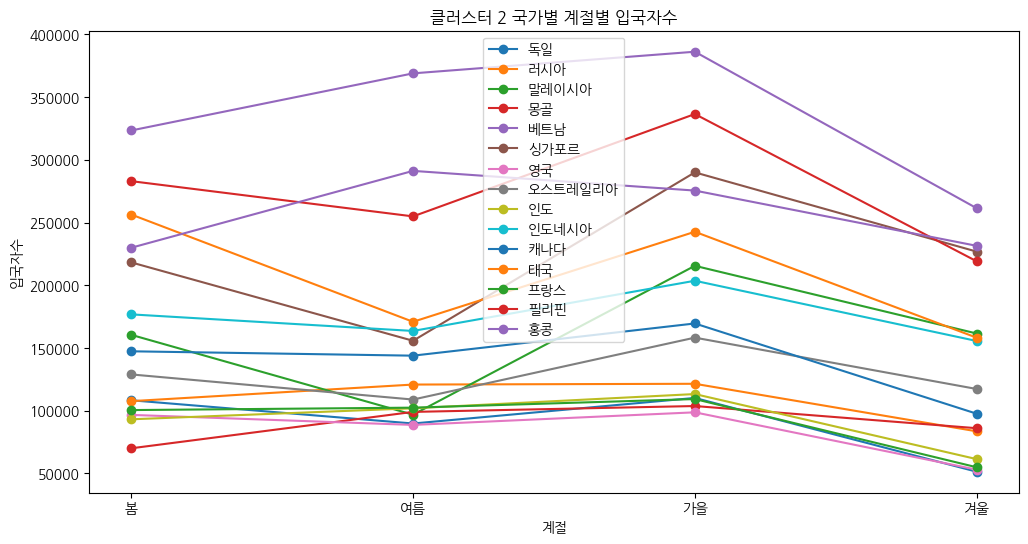

In [80]:
#클러스터 2
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 2].T.drop('클러스터'), marker='o')
plt.title('클러스터 2 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 2].index)
plt.show()

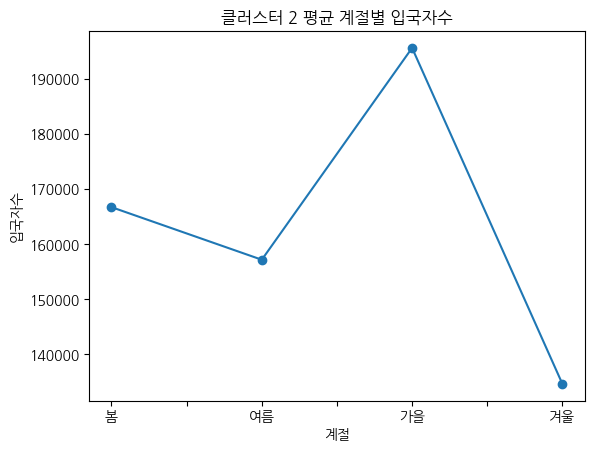

In [81]:
#클러스터2는 국가가 너무 많아 그래프가 보기 힘들어서 평균값으로 확인
seasonal_df[seasonal_df['클러스터'] == 2].drop(columns=['클러스터']).mean().plot(kind='line', marker='o')
plt.title('클러스터 2 평균 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.show()

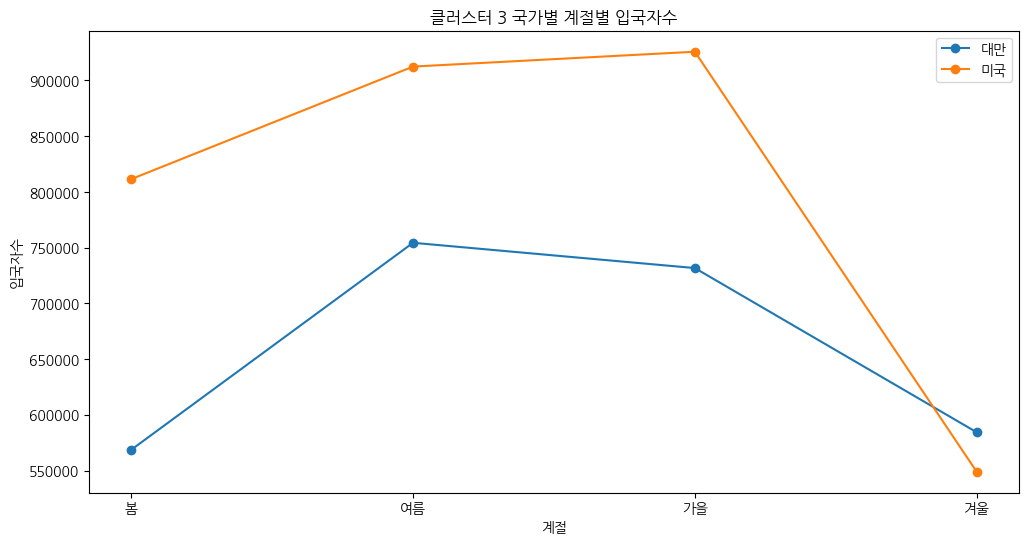

In [82]:
#클러스터 3
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 3].T.drop('클러스터'), marker='o')
plt.title('클러스터 3 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 3].index)
plt.show()

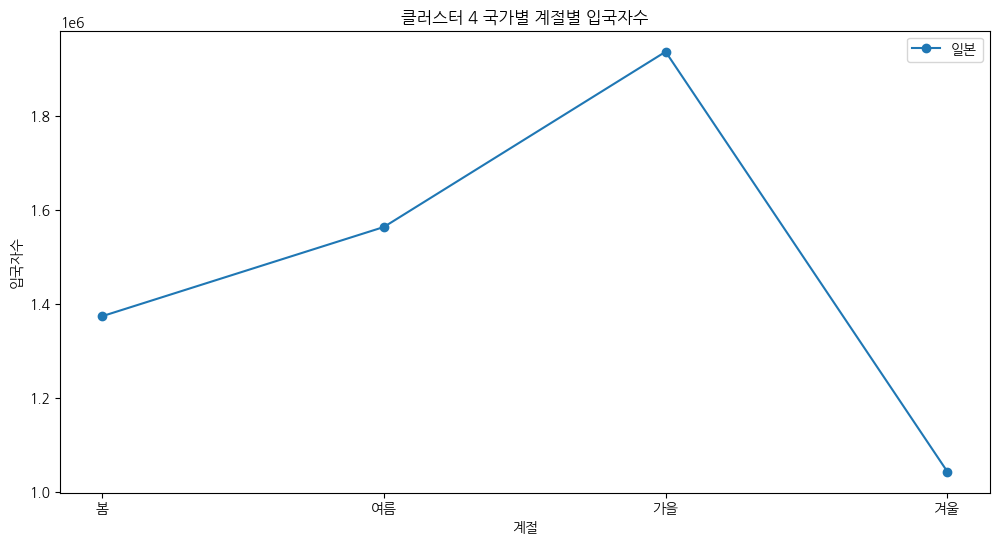

In [83]:
#클러스터 4
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 4].T.drop('클러스터'), marker='o')
plt.title('클러스터 4 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 4].index)
plt.show()

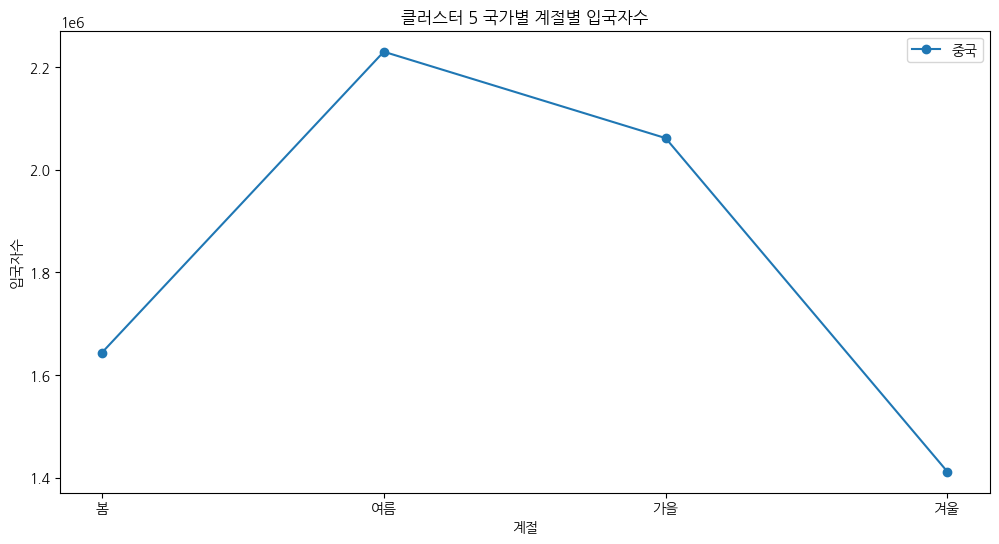

In [84]:
#클러스터 5
plt.figure(figsize=(12, 6))
plt.plot(seasonal_df[seasonal_df['클러스터'] == 5].T.drop('클러스터'), marker='o')
plt.title('클러스터 5 국가별 계절별 입국자수')
plt.ylabel('입국자수')
plt.xlabel('계절')
plt.legend(seasonal_df[seasonal_df['클러스터'] == 5].index)
plt.show()